In [119]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

from matplotlib import pyplot as plt
import seaborn as sns

In [91]:
data=pd.read_excel('data/dataBiomass_CE880.xlsx',skiprows=2,header=0).drop('Number',axis=1)
x=data.iloc[:,:8]
y=data.iloc[:,8:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [92]:
dtr=DecisionTreeRegressor()
param_grid_dtr={
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10]
}
gs_dtr=GridSearchCV(dtr,param_grid_dtr,scoring='neg_mean_squared_error')
gs_dtr.fit(x_train,y_train)
gs_dtr.best_score_

-65.81147422357886

In [93]:
rfr=RandomForestRegressor()
param_grid_rfr={
    'n_estimators':[5,10,20,100],
    'max_depth':[5,10,20],
    'min_samples_split':[2,5,10]
}
gs_rfr=GridSearchCV(rfr,param_grid=param_grid_rfr,scoring='neg_mean_squared_error')
gs_rfr.fit(x_train,y_train)
gs_rfr.best_score_

-46.01003217010553

In [94]:
# svr=MultiOutputRegressor(SVR())
# param_grid_svr = {
#     'estimator__kernel': ['linear', 'rbf'],
#     'estimator__C': [0.1, 1.0, 10.0],
#     'estimator__epsilon': [0.1, 0.2, 0.5],
# }
# grid_svr=GridSearchCV(svr,param_grid=param_grid_svr,scoring='neg_mean_squared_error')
# grid_svr.fit(x_train,y_train)
# grid_svr.best_score_

In [95]:
# svr.get_params().keys()

In [96]:
best_rfr=gs_rfr.best_estimator_
y_pred=best_rfr.predict(x_test)
y_pred

array([[2.87348038e+01, 3.22346506e+01, 2.28235664e+01, 1.62069793e+01,
        1.09631456e+01, 3.29320637e+00, 3.28703254e+01],
       [4.82113639e+01, 1.96029479e+01, 2.40312051e+01, 8.15448310e+00,
        5.78612855e+00, 1.41443730e+00, 3.70409627e+00],
       [2.31645639e+01, 3.36785795e+01, 3.16540353e+01, 1.13187920e+01,
        6.50170961e+00, 9.86697214e+00, 2.55016618e+01],
       [2.80316377e+01, 2.93804067e+01, 3.25286131e+01, 1.00593425e+01,
        6.58836140e+00, 1.12714614e+01, 2.97975550e+01],
       [2.33035014e+01, 3.86259800e+01, 2.65966572e+01, 1.16394614e+01,
        8.08989908e+00, 1.57230155e+01, 5.28680543e+01],
       [5.10560642e+01, 1.15738583e+01, 2.94022094e+01, 7.96906818e+00,
        8.89326413e+00, 5.82515849e+00, 3.58589680e+00],
       [1.85896224e+01, 3.05405293e+01, 4.11735089e+01, 9.70533937e+00,
        8.41913792e+00, 8.54979915e+00, 1.35080971e+01],
       [2.96481141e+01, 3.10249973e+01, 2.81848529e+01, 1.11420357e+01,
        7.28065017e+00, 1

In [114]:
score_list=[]
arr_y_test=np.array(y_test)
for i in range(y_test.shape[1]):
    score_list.append(np.sqrt(mean_squared_error(arr_y_test[:,i],y_pred[:,i])))
score_list


[3.2152318929346237,
 3.3983389966629485,
 4.092532222372995,
 1.3415476889469424,
 1.5591216892047917,
 5.230575021451215,
 10.6527924496732]

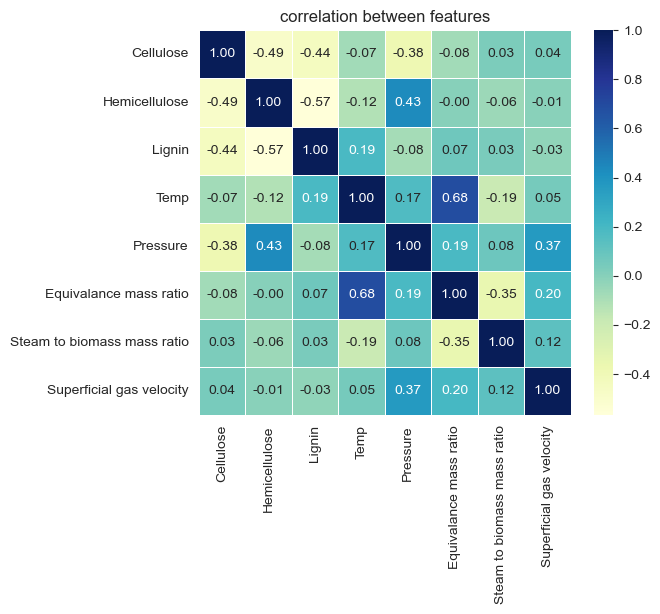

In [118]:
corr_matrix_feature=data.iloc[:,:8].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix_feature,cmap='YlGnBu',annot=True,linewidths=0.5,fmt='.2f')
plt.title('correlation between features')
plt.show()

In [142]:
# pca=PCA(n_components=4)
# x=pca.fit_transform(data.iloc[:,:8])
# y=data.iloc[:,8:]
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [143]:
# dtr = DecisionTreeRegressor()
# param_grid_dtr = {
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split': [2, 5, 10]
# }
# gs_dtr = GridSearchCV(dtr, param_grid_dtr, scoring='neg_mean_squared_error')
# gs_dtr.fit(x_train, y_train)
# gs_dtr.best_score_

-86.18113075894057

In [144]:
# rfr = RandomForestRegressor()
# param_grid_rfr = {
#     'n_estimators': [5, 10, 20, 100],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }
# gs_rfr = GridSearchCV(rfr, param_grid=param_grid_rfr, scoring='neg_mean_squared_error')
# gs_rfr.fit(x_train, y_train)
# gs_rfr.best_score_

-64.9633495279427

In [146]:
# best_rfr = gs_rfr.best_estimator_
# y_pred = best_rfr.predict(x_test)
# y_pred
# score_list = []
# arr_y_test = np.array(y_test)
# for i in range(y_test.shape[1]):
#     score_list.append(np.sqrt(mean_squared_error(arr_y_test[:, i], y_pred[:, i])))
# score_list


[6.350369685284342,
 4.498843147257734,
 5.11868082497062,
 1.7939588164257796,
 2.2697742004958337,
 7.455451345540711,
 11.799380019775695]